In [1]:
import sys
import os
sys.path.append("..") 
import importlib
import functions.data_class as data_class
import functions.plot as plot
import matplotlib .pyplot as plt
import numpy as np
importlib.reload(data_class)
importlib.reload(plot)


<module 'functions.plot' from '..\\functions\\plot.py'>

In [2]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
%%html
<style>
.output_svg div{
  width: 100% !important;
  height: 100% !important;
}
</style>

In [4]:
# Example for plot_scatter_with_hist function.
# Read data ...
projection_path = '../h5_projected'
version = 'g1040_0016_binary_search_100_fib', 'g1041_9015_by_mass_100_fib'

para_main_file = os.path.join(projection_path, version[0], 'main.h5')
perp_main_file = os.path.join(projection_path, version[1], 'main.h5')

para_data = data_class.main_data(para_main_file)
perp_data = data_class.main_data(perp_main_file)

para_data.calc_dgf(dense_gas=4413.0297186780,
                   total_cloud_mass=11002.1148454371,
                   contour_cloud_mass=3642.722286)
perp_data.calc_dgf(dense_gas=950.9536251046,
                   total_cloud_mass=11002.1148454371,
                   contour_cloud_mass=3642.722489)

In [5]:
np.max(para_data['cloud_aspect']) , np.max(perp_data['cloud_aspect'])




# plt.scatter(para_data['b_offset'], para_data['cloud_aspect'])
# plt.show()
para_data.table

,cloud_orientation,b_orientation,mcf_area,mcf_slope,cloud_aspect,cloud_mass,los_x,los_y,los_z,b_offset,dgf
0,89.978609,88.552443,188.071306,0.002594,5.003220,3310.834506,0.000000,1.000000,0.000000,1.426166,0.441316
1,-81.484437,-82.583865,196.166771,0.002443,4.995754,3320.031534,-0.147466,0.979798,0.135091,1.099429,0.440093
2,88.487708,86.651634,196.205335,0.002504,4.799765,3320.287049,0.024600,0.959596,-0.280304,1.836075,0.440059
3,77.532390,76.068500,189.325411,0.002799,4.793150,3311.568818,0.208597,0.939394,0.272078,1.463891,0.441218
4,-67.253893,-68.226106,201.016155,0.002478,5.092139,3311.846484,-0.387790,0.919192,-0.068595,0.972213,0.441181
...,...,...,...,...,...,...,...,...,...,...,...
95,84.429366,86.522265,202.233208,0.002437,4.610296,3325.648933,-0.090178,-0.919192,0.383346,2.092899,0.439350
96,79.841414,81.234335,190.873694,0.002760,4.760240,3320.540379,-0.167543,-0.939394,-0.299113,1.392921,0.440026
97,-74.338242,-73.147948,195.548619,0.002571,5.048809,3319.831551,0.267223,-0.959596,0.088133,1.190294,0.440120
98,79.436128,81.112456,185.042074,0.002717,4.954045,3293.767528,-0.182359,-0.979798,0.082105,1.676328,0.443602


In [6]:
aspect_ratio     = np.linspace(1, 5.3, 100)
perp_n_para_above, perp_n_perp_above = np.zeros_like(aspect_ratio), np.zeros_like(aspect_ratio)
para_n_para_above, para_n_perp_above = np.zeros_like(aspect_ratio), np.zeros_like(aspect_ratio)

for i, ar in enumerate(aspect_ratio):
    
    perp_n_para_above[i] = np.sum(perp_data['b_offset'][perp_data['cloud_aspect'] > ar] < 45)
    perp_n_perp_above[i] = np.sum(perp_data['b_offset'][perp_data['cloud_aspect'] > ar] > 45)

    para_n_para_above[i] = np.sum(para_data['b_offset'][para_data['cloud_aspect'] > ar] < 45)
    para_n_perp_above[i] = np.sum(para_data['b_offset'][para_data['cloud_aspect'] > ar] > 45)

<ipython-input-7-ab45cdcaf93c>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(aspect_ratio, para_n_para_above / (para_n_perp_above + para_n_para_above), **args)
<ipython-input-7-ab45cdcaf93c>:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(aspect_ratio, perp_n_para_above / (perp_n_perp_above + perp_n_para_above), **args2)


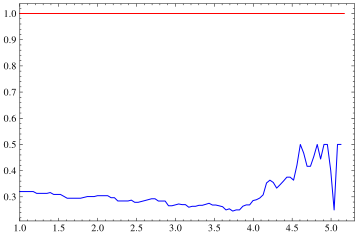

In [7]:
args =  { 'ls': 'solid', 'marker': '', 'color': 'red'}
args2 = { 'ls': 'solid', 'marker': '', 'color': 'blue'}

plt.plot(aspect_ratio, para_n_para_above / (para_n_perp_above + para_n_para_above), **args)
# plt.plot(aspect_ratio, para_n_perp_above, lw = 2, **args)

plt.plot(aspect_ratio, perp_n_para_above / (perp_n_perp_above + perp_n_para_above), **args2)
# plt.plot(aspect_ratio, perp_n_perp_above, **args2)

# plt.ylim(0, 90)
plt.xlim(1, 5.3)
plt.show()

In [8]:
# plotting distribution of cloud-field offset for projections above certain axpect ratio.

aspect_ratio = np.linspace(1, 5.3, 100)
para_b_offset_above_q1, para_b_offset_above_q2, para_b_offset_above_q3 = \
    np.zeros_like(aspect_ratio), np.zeros_like(aspect_ratio), np.zeros_like(aspect_ratio)
perp_b_offset_above_q1, perp_b_offset_above_q2, perp_b_offset_above_q3 = \
    np.zeros_like(aspect_ratio), np.zeros_like(aspect_ratio), np.zeros_like(aspect_ratio)


for i, ar in enumerate(aspect_ratio):

    para_b_offset_above_q1[i] = np.nanquantile(
        para_data['b_offset'][para_data['cloud_aspect'] > ar], q = 0.25)
    para_b_offset_above_q2[i] = np.nanquantile(
        para_data['b_offset'][para_data['cloud_aspect'] > ar], q = 0.5)
    para_b_offset_above_q3[i] = np.nanquantile(
        para_data['b_offset'][para_data['cloud_aspect'] > ar], q = 0.75)

    perp_b_offset_above_q1[i] = np.nanquantile(
        perp_data['b_offset'][perp_data['cloud_aspect'] > ar], q = 0.25)
    perp_b_offset_above_q2[i] = np.nanquantile(
        perp_data['b_offset'][perp_data['cloud_aspect'] > ar], q = 0.5)
    perp_b_offset_above_q3[i] = np.nanquantile(
        perp_data['b_offset'][perp_data['cloud_aspect'] > ar], q = 0.75)


C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarnin

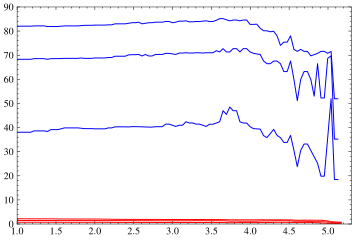

In [9]:
args = { 'ls': 'solid', 'marker': '', 'color': 'red'}
args2 = { 'ls': 'solid', 'marker': '', 'color': 'blue'}

plt.plot(aspect_ratio, para_b_offset_above_q1, **args)
plt.plot(aspect_ratio, para_b_offset_above_q2, **args)
plt.plot(aspect_ratio, para_b_offset_above_q3, **args)

plt.plot(aspect_ratio, perp_b_offset_above_q1, **args2)
plt.plot(aspect_ratio, perp_b_offset_above_q2, **args2)
plt.plot(aspect_ratio, perp_b_offset_above_q3, **args2)

plt.ylim(0, 90)
plt.xlim(1, 5.3)
plt.show()

In [10]:
# plotting distribution of mcf slope for projections above certain axpect ratio.

aspect_ratio = np.linspace(1, 5.3, 100)
para_b_offset_above_q1, para_b_offset_above_q2, para_b_offset_above_q3 = \
    np.zeros_like(aspect_ratio), np.zeros_like(aspect_ratio), np.zeros_like(aspect_ratio)
perp_b_offset_above_q1, perp_b_offset_above_q2, perp_b_offset_above_q3 = \
    np.zeros_like(aspect_ratio), np.zeros_like(aspect_ratio), np.zeros_like(aspect_ratio)


for i, ar in enumerate(aspect_ratio):

    para_b_offset_above_q1[i] = np.nanquantile(
        para_data['mcf_slope'][para_data['cloud_aspect'] > ar], q = 0.25)
    para_b_offset_above_q2[i] = np.nanquantile(
        para_data['mcf_slope'][para_data['cloud_aspect'] > ar], q = 0.5)
    para_b_offset_above_q3[i] = np.nanquantile(
        para_data['mcf_slope'][para_data['cloud_aspect'] > ar], q = 0.75)

    perp_b_offset_above_q1[i] = np.nanquantile(
        perp_data['mcf_slope'][perp_data['cloud_aspect'] > ar], q = 0.25)
    perp_b_offset_above_q2[i] = np.nanquantile(
        perp_data['mcf_slope'][perp_data['cloud_aspect'] > ar], q = 0.5)
    perp_b_offset_above_q3[i] = np.nanquantile(
        perp_data['mcf_slope'][perp_data['cloud_aspect'] > ar], q = 0.75)


C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarnin

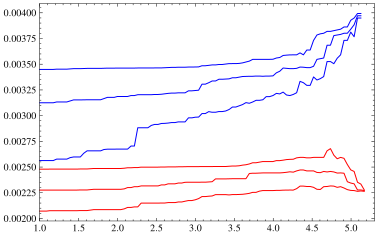

In [11]:
args = { 'ls': 'solid', 'marker': '', 'color': 'red'}
args2 = { 'ls': 'solid', 'marker': '', 'color': 'blue'}

plt.plot(aspect_ratio, para_b_offset_above_q1, **args)
plt.plot(aspect_ratio, para_b_offset_above_q2, **args)
plt.plot(aspect_ratio, para_b_offset_above_q3, **args)

plt.plot(aspect_ratio, perp_b_offset_above_q1, **args2)
plt.plot(aspect_ratio, perp_b_offset_above_q2, **args2)
plt.plot(aspect_ratio, perp_b_offset_above_q3, **args2)

# plt.ylim(0, 90)
plt.xlim(1, 5.3)
plt.show()

In [12]:
# plotting distribution of mcf slope for projections above certain axpect ratio.

aspect_ratio = np.linspace(1, 5.3, 100)
para_b_offset_above_q1, para_b_offset_above_q2, para_b_offset_above_q3 = \
    np.zeros_like(aspect_ratio), np.zeros_like(aspect_ratio), np.zeros_like(aspect_ratio)
perp_b_offset_above_q1, perp_b_offset_above_q2, perp_b_offset_above_q3 = \
    np.zeros_like(aspect_ratio), np.zeros_like(aspect_ratio), np.zeros_like(aspect_ratio)


for i, ar in enumerate(aspect_ratio):

    para_b_offset_above_q1[i] = np.nanquantile(
        para_data['dgf'][para_data['cloud_aspect'] > ar], q = 0.25)
    para_b_offset_above_q2[i] = np.nanquantile(
        para_data['dgf'][para_data['cloud_aspect'] > ar], q = 0.5)
    para_b_offset_above_q3[i] = np.nanquantile(
        para_data['dgf'][para_data['cloud_aspect'] > ar], q = 0.75)

    perp_b_offset_above_q1[i] = np.nanquantile(
        perp_data['dgf'][perp_data['cloud_aspect'] > ar], q = 0.25)
    perp_b_offset_above_q2[i] = np.nanquantile(
        perp_data['dgf'][perp_data['cloud_aspect'] > ar], q = 0.5)
    perp_b_offset_above_q3[i] = np.nanquantile(
        perp_data['dgf'][perp_data['cloud_aspect'] > ar], q = 0.75)


C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hinhi\ProgramFiles\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarnin

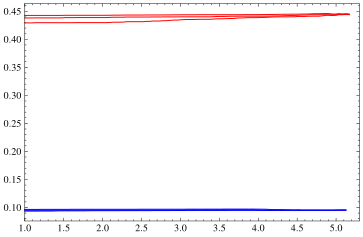

In [13]:
args = { 'ls': 'solid', 'marker': '', 'color': 'red'}
args2 = { 'ls': 'solid', 'marker': '', 'color': 'blue'}

plt.plot(aspect_ratio, para_b_offset_above_q1, **args)
plt.plot(aspect_ratio, para_b_offset_above_q2, **args)
plt.plot(aspect_ratio, para_b_offset_above_q3, **args)

plt.plot(aspect_ratio, perp_b_offset_above_q1, **args2)
plt.plot(aspect_ratio, perp_b_offset_above_q2, **args2)
plt.plot(aspect_ratio, perp_b_offset_above_q3, **args2)

# plt.ylim(0, 90)
plt.xlim(1, 5.3)
plt.show()

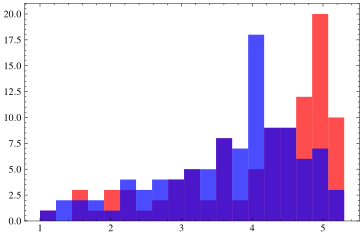

In [23]:
bins = np.linspace(1, 5.3, 20)

plt.hist(para_data['cloud_aspect'], alpha = 0.7, color = 'red', bins = bins)
plt.hist(perp_data['cloud_aspect'], alpha = 0.7, color = 'blue', bins = bins)

plt.show()